<a href="https://colab.research.google.com/github/lmntrx-sys/Diffusion/blob/main/NeuralNet_and_LinRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a simple feedforward neural net to compare the losses with a linear regressoin model

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Fetch the data
data_path = fetch_california_housing(as_frame=True)

In [3]:
df = pd.DataFrame(data_path.data, columns=data_path.feature_names)
df['target'] = data_path.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Linear Regression model

In [6]:
# Create a simple neaural net to compare the results
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

0.5558915986952444


# Neural network

In [7]:
import torch

# create a simple feedforward neuralnet to fit the data
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

neural_model = NeuralNet(input_size=8, hidden_size=16, num_classes=1)
optimizer = torch.optim.Adam(neural_model.parameters(), lr=0.01)


In [8]:
# Convert the data to tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [10]:
# Train the neural network

for epoch in range(1000):
    y_pred = neural_model(X_train)
    loss = torch.nn.functional.mse_loss(y_pred, y_train.unsqueeze(1))
    print(f'Epoch {epoch}: loss = {loss}')
    neural_model.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = neural_model(X_test)

def MSE(y_true, y_pred):
    return torch.mean((y_true - y_pred)**2)

print(MSE(y_test, y_pred))

Epoch 0: loss = 0.8972032070159912
Epoch 1: loss = 0.8966680765151978
Epoch 2: loss = 0.8961342573165894
Epoch 3: loss = 0.8956011533737183
Epoch 4: loss = 0.8950690031051636
Epoch 5: loss = 0.8945373892784119
Epoch 6: loss = 0.8940063714981079
Epoch 7: loss = 0.8934767246246338
Epoch 8: loss = 0.892947793006897
Epoch 9: loss = 0.8924195766448975
Epoch 10: loss = 0.8918917775154114
Epoch 11: loss = 0.8913650512695312
Epoch 12: loss = 0.8908393979072571
Epoch 13: loss = 0.8903141021728516
Epoch 14: loss = 0.8897894620895386
Epoch 15: loss = 0.8892662525177002
Epoch 16: loss = 0.8887437582015991
Epoch 17: loss = 0.888221800327301
Epoch 18: loss = 0.8877004981040955
Epoch 19: loss = 0.8871803283691406
Epoch 20: loss = 0.8866609334945679
Epoch 21: loss = 0.8861420154571533
Epoch 22: loss = 0.8856242895126343
Epoch 23: loss = 0.8851068615913391
Epoch 24: loss = 0.8845905065536499
Epoch 25: loss = 0.8840752243995667
Epoch 26: loss = 0.8835604786872864
Epoch 27: loss = 0.8830462098121643
Epoc

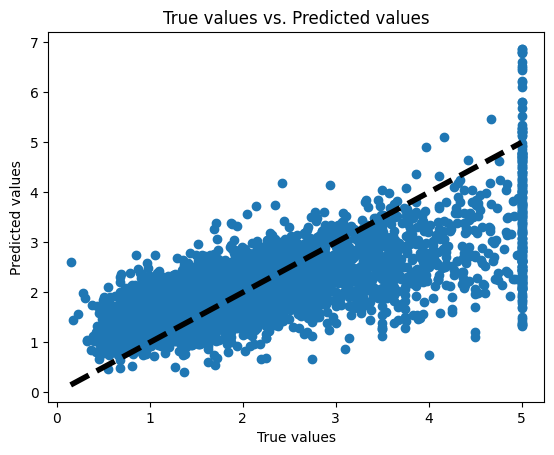

In [11]:
y_test = y_test.detach().numpy()
y_pred = y_pred.detach().numpy()

# plot the model's loss
fig, ax = plt.subplots()
ax.plot(y_test, y_pred, 'o')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('True values')
ax.set_ylabel('Predicted values')
plt.title('True values vs. Predicted values')
plt.show()